### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [405]:
#Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [406]:
#read the data and import it in to a dataframe

df_ratings = pd.read_csv("Data.csv")
df_movie = pd.read_csv("item.csv")
df_user = pd.read_csv("user.csv")

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [407]:
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

print("====================== Rating info =====================================")
print(" ")
df_ratings.info()   
print(" ")
print("====================== Movie info ======================================")
print(" ")
df_movie.info()
print(" ")
print("====================== User info =======================================")
print(" ")
df_user.info()
print(" ")
print("=========================================================================")
# no null values found in any of the csv files

====================== Rating info =====================================
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
 
====================== Movie info ======================================
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 

In [408]:
# Shape function returns a tuple representing the dimensionality of the DataFrame.

print("====================== Rating table dimensions =====================================")
print(" ")
ratings_shape = df_ratings.shape
print(ratings_shape)
print(" ")
print("====================== Movie table dimensions ======================================")
print(" ")
movie_shape = df_movie.shape
print(movie_shape)
print(" ")
print("====================== User table dimensions =======================================")
print(" ")
user_shape = df_user.shape
print(user_shape)
print(" ")
print("====================================================================================")

====================== Rating table dimensions =====================================
 
(100000, 4)
 
====================== Movie table dimensions ======================================
 
(1681, 22)
 
====================== User table dimensions =======================================
 
(943, 5)
 


In [409]:
print("====================== Rating table dimensions =====================================")
print(" ")
ratings_describe = df_ratings.describe()
print(ratings_describe)
print(" ")
print("====================== Movie table dimensions ======================================")
print(" ")
movie_describe = df_movie.describe()
print(movie_describe)
print(" ")
print("====================== User table dimensions =======================================")
print(" ")
user_describe = df_user.describe()
print(user_describe)
print(" ")
print("====================================================================================")

====================== Rating table dimensions =====================================
 
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
 
====================== Movie table dimensions ======================================
 
          movie id      unknown       Action    Adventure    Animation  \
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000   
mean    841.841761     0.000595     0.149316     0.080309     0.024985   
std     485.638077     0.0

In [410]:
# Function used to detect the missing values

print("====================== Rating table dimensions =====================================")
print(" ")
ratings_isnull = df_ratings.isna().sum()
print(ratings_isnull)
print(" ")
print("====================== Movie table dimensions ======================================")
print(" ")
movie_isnull = df_movie.isna().sum()
print(movie_isnull)
print(" ")
print("====================== User table dimensions =======================================")
print(" ")
user_isnull = df_user.isna().sum()
print(user_isnull)
print(" ")
print("====================================================================================")
print(" ")
print("                    There is no missing values in this data")
print(" ")
print("====================================================================================")


====================== Rating table dimensions =====================================
 
user id      0
movie id     0
rating       0
timestamp    0
dtype: int64
 
====================== Movie table dimensions ======================================
 
movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64
 
====================== User table dimensions =======================================
 
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64
 
 
                    There is no missing values in this data
 


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [411]:
moviesByGenre = df_movie[['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]
totMoviesByGenre = moviesByGenre.sum()

print("============================= Total Movies by Genre =======================================================")
print(" ")
print(moviesByGenre.sum())
print(" ")
print("===========================================================================================================")

============================= Total Movies by Genre =======================================================
 
unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64
 


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [412]:
# create a copy of df_movie

df_movie_copy = df_movie.copy()

#dropping the unknown genre
dropUnknownGenre = df_movie_copy.drop(df_movie_copy[df_movie_copy['unknown']>0].index,inplace=True)

#check if the drop worked
moviesByUnknownGenre = df_movie_copy[['unknown']]
totMoviesByUnknownGenre = moviesByUnknownGenre.sum()

print("============================= Total Movies by Unknown Genre =======================================================")
print(totMoviesByUnknownGenre.sum())
print("===================================================================================================================")


============================= Total Movies by Unknown Genre =======================================================
0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [413]:
#create a copy to manipulate the data
multiGenreMovies = df_movie.copy()

col_list = list(multiGenreMovies) # pull all columns of original dataframe in to a list

col_list.remove('movie id') # remove columns that should not be part of sum
col_list.remove('movie title') # remove columns that should not be part of sum
col_list.remove('release date') # remove columns that should not be part of sum

multiGenreMovies['total_genres'] = df_movie[col_list].sum(axis=1)

# Display movie name, number of genres for the movie in dataframe

print("============================ Movie title & its genres =================================")
print(" ")
print(multiGenreMovies[['movie title', 'total_genres']])
print(" ")

# create a new data framw with total genres more than 1
df = multiGenreMovies[multiGenreMovies['total_genres']>1]

#convert the movie title in to a list to display list of movies that has more than one genre
movie_list = list(df['movie title'])

# print(total number of movies which have more than one genres)
total_movies_multigenre = len(movie_list)

print("=========================== Total movies with more than one Genre =====================")
print(" ")
print("Total movies with more than one Genre",total_movies_multigenre)
print(" ")
print("=======================================================================================")

#drop the column to avoid double counting next time.
multiGenreMovies.drop(['total_genres'],axis=1,inplace=True)

============================ Movie title & its genres =================================
 
                              movie title  total_genres
0                              Toy Story              3
1                              GoldenEye              3
2                             Four Rooms              1
3                             Get Shorty              3
4                                Copycat              3
...                                   ...           ...
1676                          Mat' i syn              1
1677                           B. Monkey              2
1678                       Sliding Doors              2
1679                        You So Crazy              1
1680  Scream of Stone (Schrei aus Stein)              1

[1681 rows x 2 columns]
 
=========================== Total movies with more than one Genre =====================
 
Total movies with more than one Genre 849
 


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

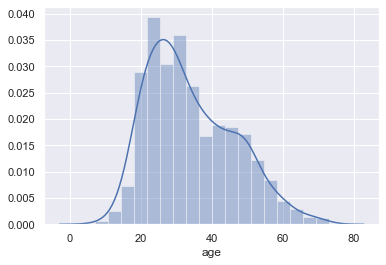

In [414]:
#Univariate plots of columns: 'Age'

sns.distplot(df_user['age']);

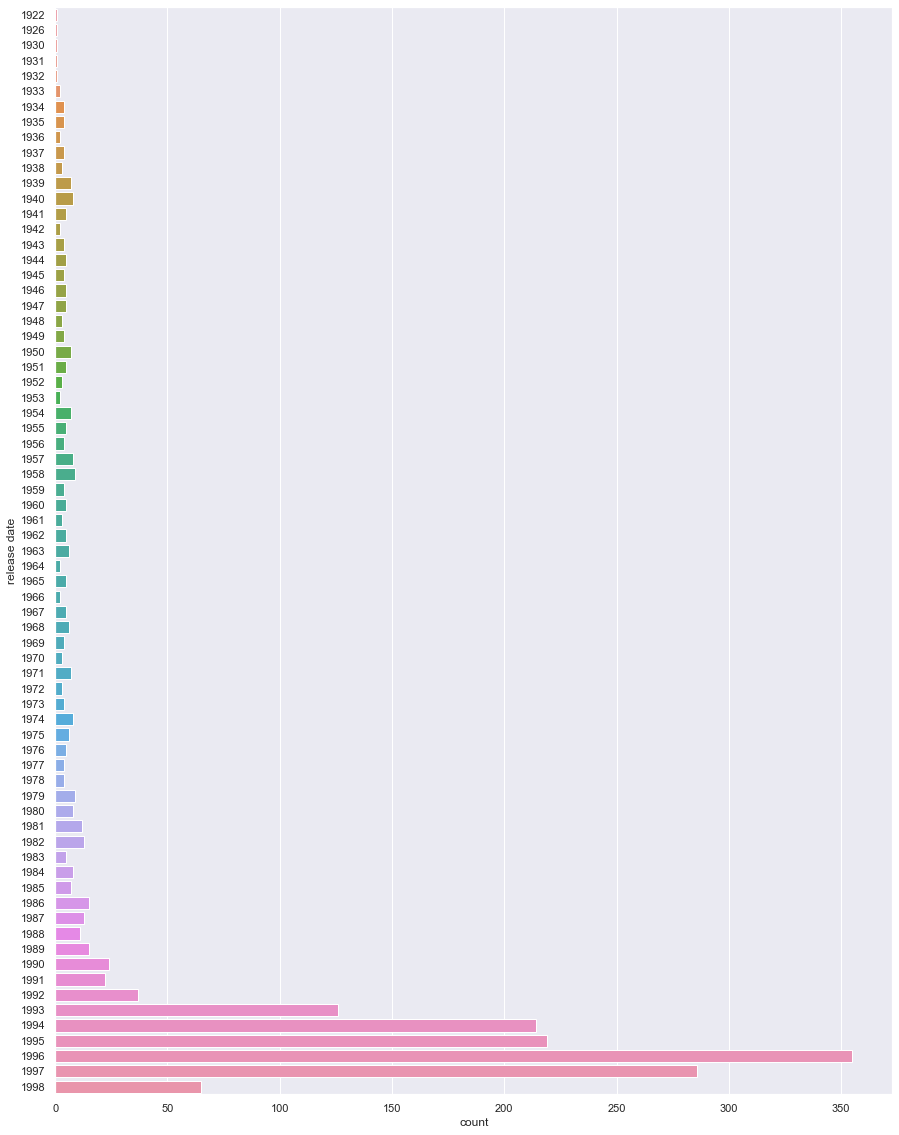

In [415]:
#Univariate plots of columns: 'release year'

date['release'] = pd.to_datetime(df_movie['release date']);
date['year'] = date['release'].dt.year

plt.figure(figsize=(15,20)) 
sns.countplot(y=date['year']);

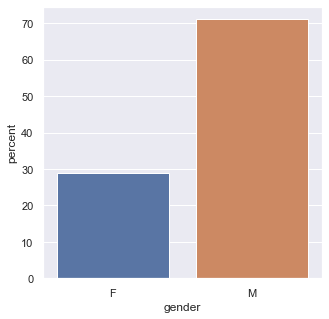

In [416]:
#Univariate plots of columns: 'gender'

plt.figure(figsize=(5,5)) 

df1 = df_user.copy()
df1['value'] = 1

tempdf=df1.groupby(['gender','value']).value.count().unstack().fillna(0)
tempdf['total']=df1['gender'].value_counts()
tempdf['percent']=tempdf['total']/len(df1)*100

tempdf.reset_index(inplace=True)

sns.barplot(x='gender',y='percent',data=tempdf)

[Text(0, 0.5, 'Percent')]

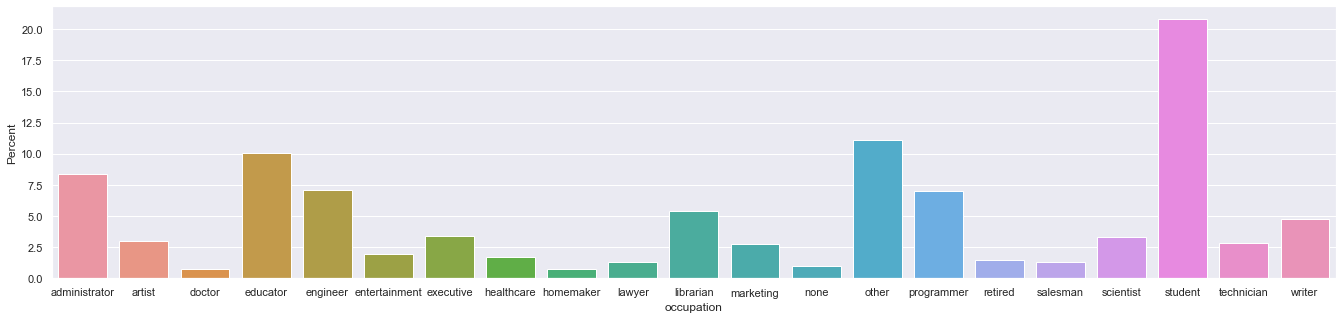

In [417]:
#Univariate plots of columns: 'occupation'

plt.figure(figsize=(23,5)) 

tempdf=df1.groupby(['occupation','value']).value.count().unstack().fillna(0)
tempdf['total_occ']=df1['occupation'].value_counts()
tempdf['percent_occ']=tempdf['total_occ']/len(df1)*100

tempdf.reset_index(inplace=True)
#print(tempdf);

ax = sns.barplot(x='occupation',y='percent_occ',data=tempdf)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

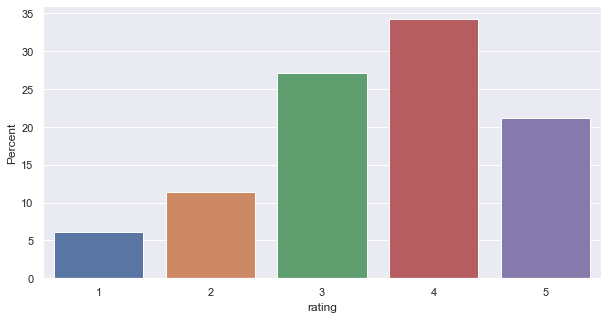

In [425]:
#Univariate plots of columns: 'rating'

df2 = df_ratings.copy()
df2['value'] = 1

tempr=df2.groupby(['rating','value']).value.count().unstack().fillna(0)
tempr['total']=df2['rating'].value_counts()
tempr['percent']=tempr['total']/len(df2)*100

tempr.reset_index(inplace=True)
#print(tempr);

plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='rating',y='percent',data=tempr)
ax.set(ylabel="Percent")

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

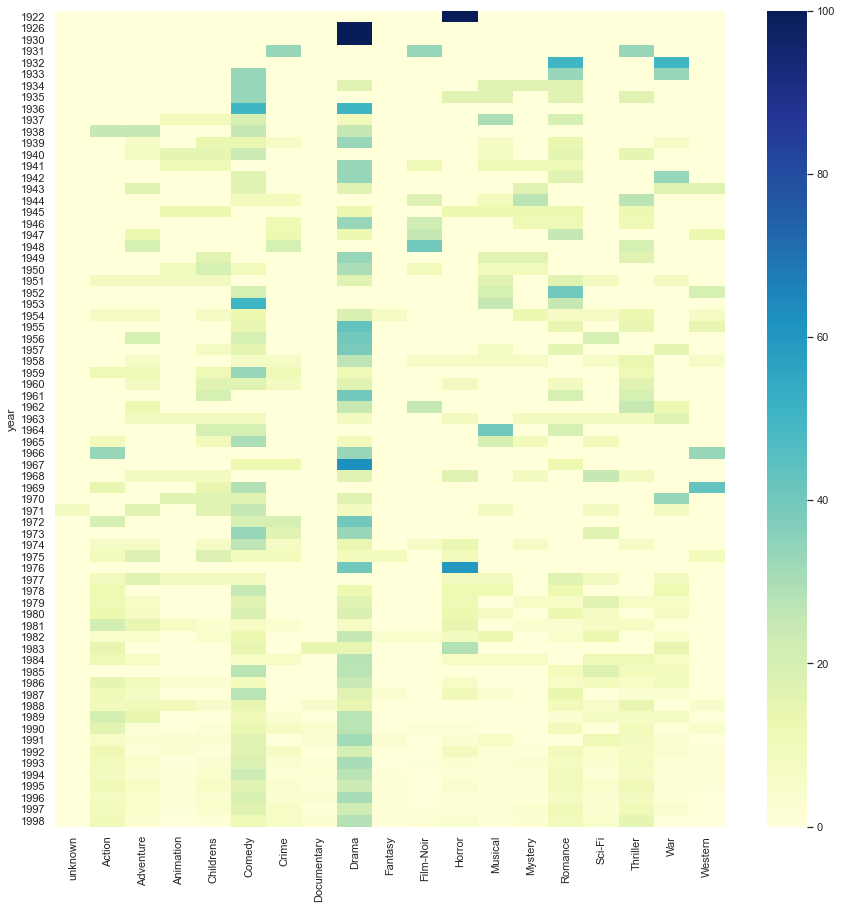

In [430]:
q8 = df_movie.copy()
q8['release'] = pd.to_datetime(q8['release date']);
q8['year'] = q8['release'].dt.year

q8.drop(['movie id'],axis=1,inplace=True)
q8.drop(['movie title'],axis=1,inplace=True)
q8.drop(['release date'],axis=1,inplace=True)
q8.drop(['release'],axis=1,inplace=True)

q8.set_index('year',inplace=True)

q8 = q8.groupby(['year']).sum()

#using the same col_list used to calculate the answer for multi genre film (question 6)

q8['total'] = q8[col_list].sum(axis=1)

#print(q8)

q8 = (q8.loc[:,"unknown":"Western"].div(q8["total"],axis=0)*100)

#print(q8)

plt.figure(figsize=(15,15)) 

sns.heatmap(q8, cmap="YlGnBu") #assign max value of 170 as it is max individual genre total

# sns.heatmap(q8, cmap="YlGnBu", vmin=0, vmax=170, annot=True, fmt="d")  #adding annot to see values for max value

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [438]:
#Find the count of ratings and average ratings for every movie.

q9 = df_ratings.copy()

q9_temp1 = q9[['user id','movie id']]
q9_count = q9_temp1.groupby(['movie id']).count() # count number of rating for each movie

print(q9_count)

q9_temp2 = q9[['movie id','rating']]
q9_average = q9_temp2.groupby(['movie id']).mean() # AVERAGE rating for each movie

q9_100plus = q9_count[q9_count['user id']>100] #movies rating with more than 100 users
q9_100plus = q9_100plus.sort_values(by=['user id'], ascending=False) # sort descending based on the user rating

q9_100plus_top25 = q9_100plus.head(25)

print(q9_count)

q9_100plus_top25_merge = q9_100plus_top25.merge(df_movie, how="left", left_on='movie id', right_on='movie id')

q9_100plus_top25_moviename = list(q9_100plus_top25_merge['movie title'])

print("================================================ Top 25 Movie Names ===================================================")
print(" ")
print(q9_100plus_top25_moviename)
print("=======================================================================================================================")

          user id
movie id         
1             452
2             131
3              90
4             209
5              86
...           ...
1678            1
1679            1
1680            1
1681            1
1682            1

[1682 rows x 1 columns]
          user id
movie id         
1             452
2             131
3              90
4             209
5              86
...           ...
1678            1
1679            1
1680            1
1681            1
1682            1

[1682 rows x 1 columns]
================================================ Top 25 Movie Names ===================================================
 
['Star Wars ', 'Contact ', 'Fargo ', 'Return of the Jedi ', 'Liar Liar ', 'English Patient, The ', 'Scream ', 'Toy Story ', 'Air Force One ', 'Independence Day (ID4) ', 'Raiders of the Lost Ark ', 'Godfather, The ', 'Pulp Fiction ', 'Twelve Monkeys ', 'Silence of the Lambs, The ', 'Jerry Maguire ', 'Rock, The ', 'Empire Strikes Back, The ', 'Star Trek: First

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [421]:
# merge ratings with user

rating_user_merge = df_user.merge(df_ratings, left_on='user id',right_on='user id')

#rating_user_merge

all_merge = rating_user_merge.merge(df_movie,how="outer",left_on='movie id',right_on='movie id')

# remove columns that are of importance to us

q10_a = all_merge[['user id','gender','Drama']]

# group by user id to remove duplicates

q10_a1 = q10_a.groupby(['user id']).sum()

#merge the user db to newly duplicates removed dataframe

q10_a1_merge = q10_a1.merge(df_user,left_on='user id',right_on='user id')

# slice only the most important information since each row is unique
q10_a1_merge_slice = q10_a1_merge[['gender','Drama']]

# Look at how many movies each group saw in Drama genre
q10_a1_merge_group = q10_a1_merge_slice.groupby(['gender']).sum()

print("======================================== Total Movies by Genre - Drama ======================================")
print(" ")
print(q10_a1_merge_group)
print(" ")
print(" Answer to Question 1 - Men watch more drama than women? - is TRUE since men watch more dramas than woman")
print(" ")
print("=============================================================================================================")



======================================== Total Movies by Genre - Drama ======================================
 
          Drama
gender         
F       11008.0
M       28887.0
 
 Answer to Question 1 - Men watch more drama than women? - is TRUE since men watch more dramas than woman
 


In [422]:
# remove columns that are of importance to us

q10_b = all_merge[['user id','gender','Sci-Fi']]

# group by user id to remove duplicates

q10_b1 = q10_b.groupby(['user id']).sum()

#merge the user db to newly duplicates removed dataframe

q10_b1_merge = q10_b1.merge(df_user,left_on='user id',right_on='user id')

# slice only the most important information since each row is unique

q10_b1_merge_slice = q10_b1_merge[['gender','Sci-Fi']]

# Look at how many movies each group saw in Drama genre

q10_b1_merge_group = q10_b1_merge_slice.groupby(['gender']).sum()

q10_b1_merge_group

print("======================================== Total Movies by Genre - Sci-Fi ======================================")
print(" ")
print(q10_b1_merge_group)
print(" ")
print(" Answer to Question 2 - Women watch more Sci-Fi than men? - is False since men watch more Sci-Fi than woman")
print(" ")
print("==============================================================================================================")

======================================== Total Movies by Genre - Sci-Fi ======================================
 
         Sci-Fi
gender         
F        2629.0
M       10101.0
 
 Answer to Question 2 - Women watch more Sci-Fi than men? - is False since men watch more Sci-Fi than woman
 


In [423]:
# remove columns that are of importance to us

q10_c = all_merge[['user id','gender','Romance']]

# group by user id to remove duplicates

q10_c1 = q10_c.groupby(['user id']).sum()

#merge the user db to newly duplicates removed dataframe

q10_c1_merge = q10_c1.merge(df_user,left_on='user id',right_on='user id')

# slice only the most important information since each row is unique

q10_c1_merge_slice = q10_c1_merge[['gender','Romance']]

# Look at how many movies each group saw in Drama genre

q10_c1_merge_group = q10_c1_merge_slice.groupby(['gender']).sum()

q10_c1_merge_group

print("======================================== Total Movies by Genre - Romance ======================================")
print(" ")
print(q10_c1_merge_group)
print(" ")
print(" Answer to Question 3 - Men watch more Romance than women? - is True since men watch more romance than woman")
print(" ")
print("==============================================================================================================")

======================================== Total Movies by Genre - Romance ======================================
 
        Romance
gender         
F        5858.0
M       13603.0
 
 Answer to Question 3 - Men watch more Romance than women? - is True since men watch more romance than woman
 
